1. PANDAS (25 points)

In [50]:
# 1 (2 marks). Load the netflix_titles.csv dataset as a Pandas dataframe:
import pandas as pd

df = pd.read_csv('netflix_titles.csv')



In [51]:
# 2 (2 marks). Show the first 10 rows of the dataset
print(df.head(10))

  show_id     type                             title  \
0      s1    Movie              Dick Johnson Is Dead   
1      s2  TV Show                     Blood & Water   
2      s3  TV Show                         Ganglands   
3      s4  TV Show             Jailbirds New Orleans   
4      s5  TV Show                      Kota Factory   
5      s6  TV Show                     Midnight Mass   
6      s7    Movie  My Little Pony: A New Generation   
7      s8    Movie                           Sankofa   
8      s9  TV Show     The Great British Baking Show   
9     s10    Movie                      The Starling   

                        director  \
0                Kirsten Johnson   
1                            NaN   
2                Julien Leclercq   
3                            NaN   
4                            NaN   
5                  Mike Flanagan   
6  Robert Cullen, José Luis Ucha   
7                   Haile Gerima   
8                Andy Devonshire   
9                 Theod

In [52]:
# 3 (1 mark). Show the last 5 rows
print(df.tail(5))

     show_id     type        title         director  \
8802   s8803    Movie       Zodiac    David Fincher   
8803   s8804  TV Show  Zombie Dumb              NaN   
8804   s8805    Movie   Zombieland  Ruben Fleischer   
8805   s8806    Movie         Zoom     Peter Hewitt   
8806   s8807    Movie       Zubaan      Mozez Singh   

                                                   cast        country  \
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
8803                                                NaN            NaN   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

             date_added  release_year rating   duration  \
8802  November 20, 2019          2007      R    158 min   
8803       July 1, 2019          2018  TV-Y7  2 Seasons   
8804   November 1, 2019          2009      R   

In [53]:
# 4 (4 marks). Count the number of rows which have no missing value in any of the columns, and show the count of non-missing values dataframe.

complete_values_df = df.dropna()

count_complete_values = complete_values_df.shape[0]

print("Number of rows with no missing values:",count_complete_values)



Number of rows with no missing values: 5332


In [54]:
# 5 (3 marks). Drop everything that is not a 'Movie' and show the resulting data frame.
movies_df = df[df['type'] == 'Movie']

print(movies_df)

     show_id   type                             title  \
0         s1  Movie              Dick Johnson Is Dead   
6         s7  Movie  My Little Pony: A New Generation   
7         s8  Movie                           Sankofa   
9        s10  Movie                      The Starling   
12       s13  Movie                      Je Suis Karl   
...      ...    ...                               ...   
8801   s8802  Movie                           Zinzana   
8802   s8803  Movie                            Zodiac   
8804   s8805  Movie                        Zombieland   
8805   s8806  Movie                              Zoom   
8806   s8807  Movie                            Zubaan   

                           director  \
0                   Kirsten Johnson   
6     Robert Cullen, José Luis Ucha   
7                      Haile Gerima   
9                    Theodore Melfi   
12              Christian Schwochow   
...                             ...   
8801                Majid Al Ansari   
880

In [56]:
# 6 (7 marks). For every movie where the duration is missing, replace it with the average
  # duration of the movies in the dataset.
    
full_df = pd.read_csv('netflix_titles.csv')    

if df['duration'].dtype == 'O' and df['duration'].str.contains(' min').any():
 df['duration'] = pd.to_numeric(df['duration'].str.replace(' min', ''), errors='coerce')

average_duration = df[df['type'] == 'Movie']['duration'].dropna().mean()  

df.loc[(df['type'] == 'Movie') & (df['duration'].isna()), 'duration'] = average_duration

print(f"The average duration of movies is: {average_duration} minutes")
print(df.head())


The average duration of movies is: 99.57718668407311 minutes
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating  duration  \
0  September 25, 2021          2020  PG-13      90.0   
1  September 24, 2021      

In [31]:
# 7 (3 marks). Are there any duplicates in the data? If yes, please remove them.

duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

if duplicates > 0: 
    df = df.drop_duplicates()
    print("Duplicates have been removed.")
else:
    print("No duplicates were found.")
        
    print(df)

Number of duplicate rows: 0
No duplicates were found.
     show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata,

In [57]:
# 8 (2 marks). Rename all columns to start with a capital letter.

df.columns = [col.capitalize() for col in df.columns]

print(df.head())

  Show_id     Type                  Title         Director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                Cast        Country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           Date_added  Release_year Rating  Duration  \
0  September 25, 2021          2020  PG-13      90.0   
1  September 24, 2021          2021  TV-MA       NaN   
2  September 24, 2021          2

In [58]:
# 9 (1 mark). Save the cleaned dataset as a new csv file.

df.to_csv('clean_netflix_titles.csv')
print("The cleaned dataset has been saved as a CSV 'clean_netflix_titles.csv'")

The cleaned dataset has been saved as a CSV 'clean_netflix_titles.csv'


2. MATPLOTLIB (25 points)

Use the netflix dataset to solve the exercises in this section.

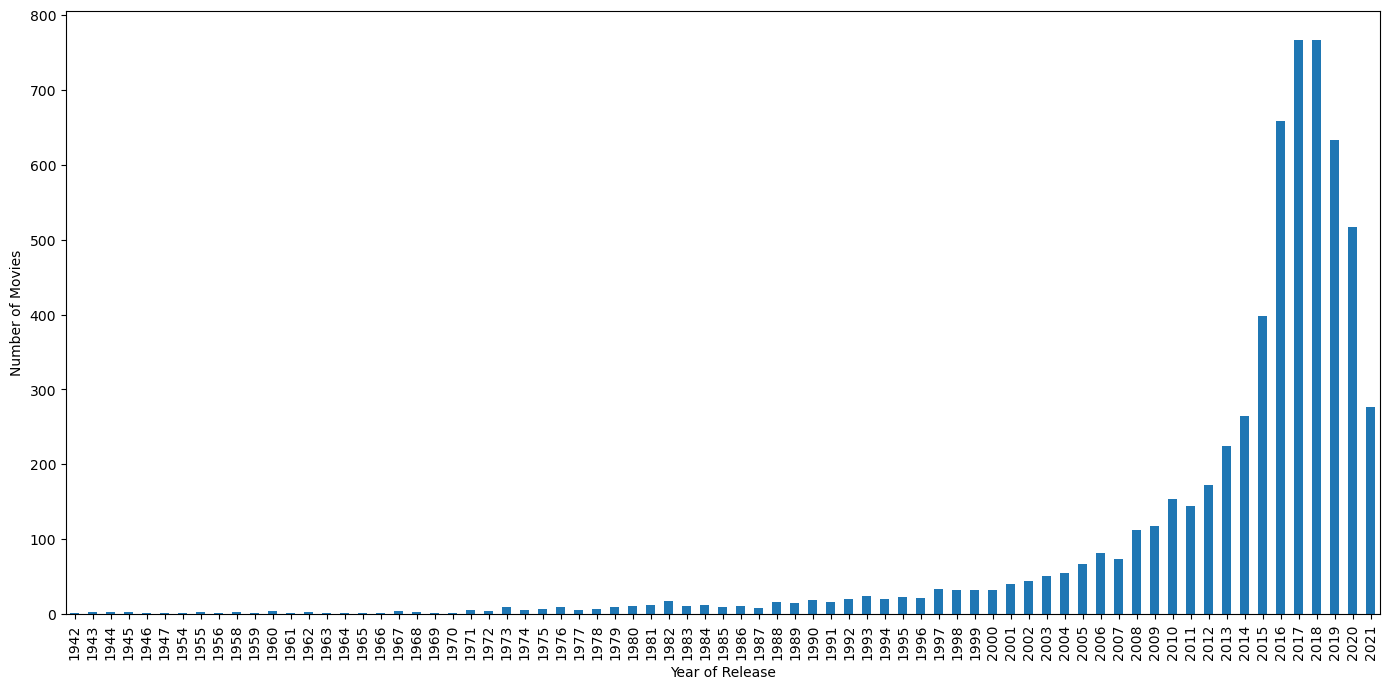

In [62]:
# 1 (10 marks). Create a visualisation which shows the frequency of movies by year of release.

import matplotlib.pyplot as plt

movies_only_df = df[df['Type'] == 'Movie']

frequency_by_year = movies_only_df['Release_year'].value_counts().sort_index()

plt.figure(figsize=(14, 7))  
frequency_by_year.plot(kind='bar')
plt.xlabel('Year of Release')
plt.ylabel('Number of Movies')
plt.tight_layout()  
plt.show()


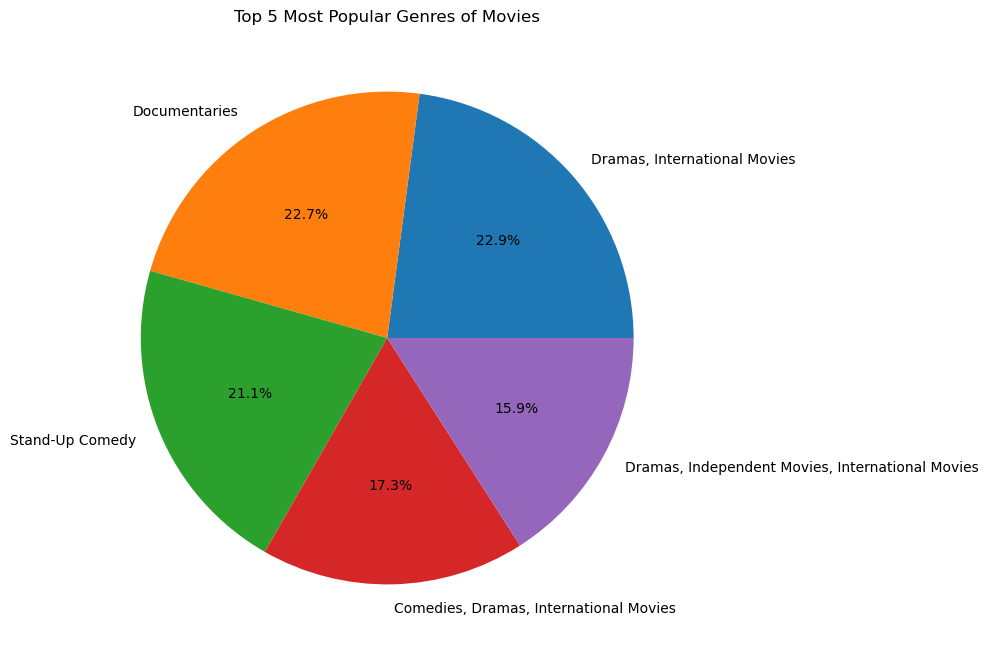

In [63]:
# 2 (15 marks). Create a pie chart which shows the 5 top most popular genres of the movies
  # in the dataset.

movies_only_df = df[df['Type'] == 'Movie']

count_genres = movies_df['listed_in'].value_counts()

top_genres = count_genres.head(5)

plt.figure(figsize=(8, 8))
top_genres.plot(kind='pie', autopct='%1.1f%%')
plt.title('Top 5 Most Popular Genres of Movies')
plt.ylabel('')  
plt.show()


3. NUMPY (25 points)

In [73]:
# 1 (2 marks). Running the code in this cell throws an error. Why do we get this error
# and how do we fix it?

# we need to import numpy
import numpy as np

# use this numpy array for all exercises in this section
arr = np.array([0, 56, 82, 500, 140, 43, 92, 10, 25, 11, 18, 26, 150, 240, 364, 196])
arr

[  0  56  82 500 140  43  92  10  25  11  18  26 150 240 364 196]


In [72]:
# 2 (5 marks). How many odd numbers do we have in the array?

count_odd = np.sum(arr % 2 != 0)

print("Number of odd numbers in array:", count_odd)


Number of odd numbers in array: 3


In [74]:
# 3 (5 marks). Replace all odd numbers in arr with 999

arr[arr % 2 != 0] = 999

print(arr)

[  0  56  82 500 140 999  92  10 999 999  18  26 150 240 364 196]


In [76]:
# 4 (8 marks). The above is a 1D array. Convert it into a 4D array and reverse its columns.

# Desired output
# > array([[500,  82,  56,   0],
# >        [ 10,  92, 999, 140],
# >        [ 26,  18, 999, 999],
# >        [196, 364, 240, 150]])

arr_4d = arr.reshape(4, 4)

reverse_4d_arr = arr_4d[:, ::-1]

print(reverse_4d_arr)


[[500  82  56   0]
 [ 10  92 999 140]
 [ 26  18 999 999]
 [196 364 240 150]]


In [78]:
# 5 (5 marks). Find all values which are higher than 100 and lower or equal than 500.

filtered_values = arr[(arr > 100) & (arr <= 500)]

print("Values higher than 100 and lower or equal to 500:", filtered_values)


Values higher than 100 and lower or equal to 500: [500 140 150 240 364 196]


In [ ]:
#Thanks for your attention! <3